In [1]:
!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import datetime
import pandas as pd

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2024,7,20)

stock = ['TSLA']

data = pdr.DataReader(stock, 'stooq', str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [3]:
newData = data.reset_index()
newData.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
1,2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2,2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
3,2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
4,2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [4]:
newData.to_csv('Tesla_stock_2018_to_2024.csv')

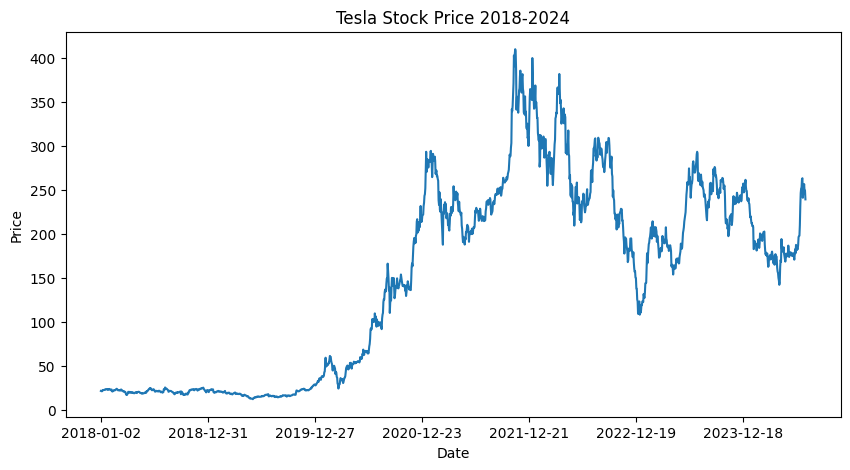

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

tsla_data = pd.read_csv('Tesla_stock_2018_to_2024.csv')
tsla_data.set_index('Date', inplace=True)
tsla_data.sort_index(ascending=True,inplace=True)
close_price = tsla_data['Close']
plt.figure(1,(10,5))
close_price.plot(xlabel='Date',ylabel='Price',title='Tesla Stock Price 2018-2024')
plt.show()

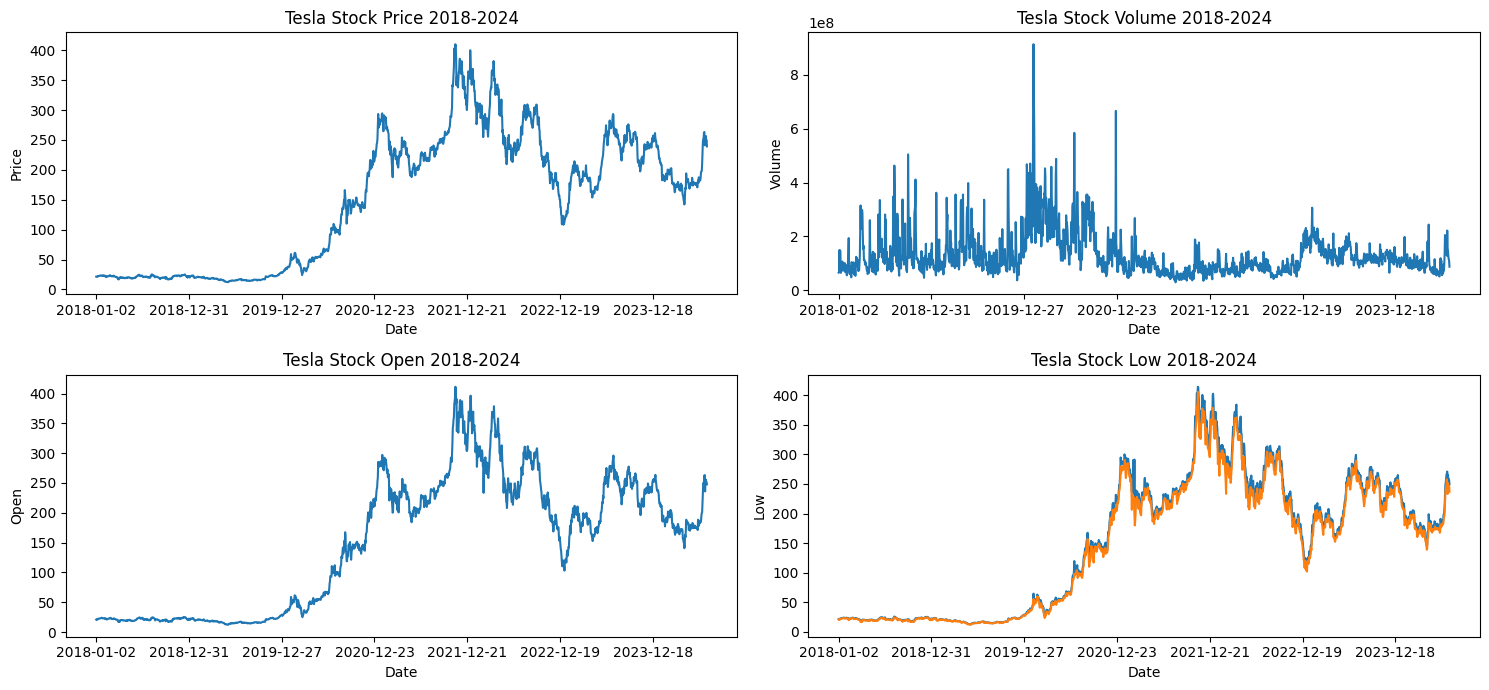

In [16]:
Volume = tsla_data['Volume']
Open = tsla_data['Open']
High = tsla_data['High']
Low = tsla_data['Low']

plt.figure(1,(15,7))
plt.subplot(2,2,1)
close_price.plot(xlabel='Date',ylabel='Price',title='Tesla Stock Price 2018-2024')

plt.subplot(2,2,2)
Volume.plot(xlabel='Date',ylabel='Volume',title='Tesla Stock Volume 2018-2024')

plt.subplot(2,2,3)
Open.plot(xlabel='Date',ylabel='Open',title='Tesla Stock Open 2018-2024')

plt.subplot(2,2,4)
High.plot(xlabel='Date',ylabel='High',title='Tesla Stock High 2018-2024')
Low.plot(xlabel='Date',ylabel='Low',title='Tesla Stock Low 2018-2024')

plt.tight_layout()
plt.show()

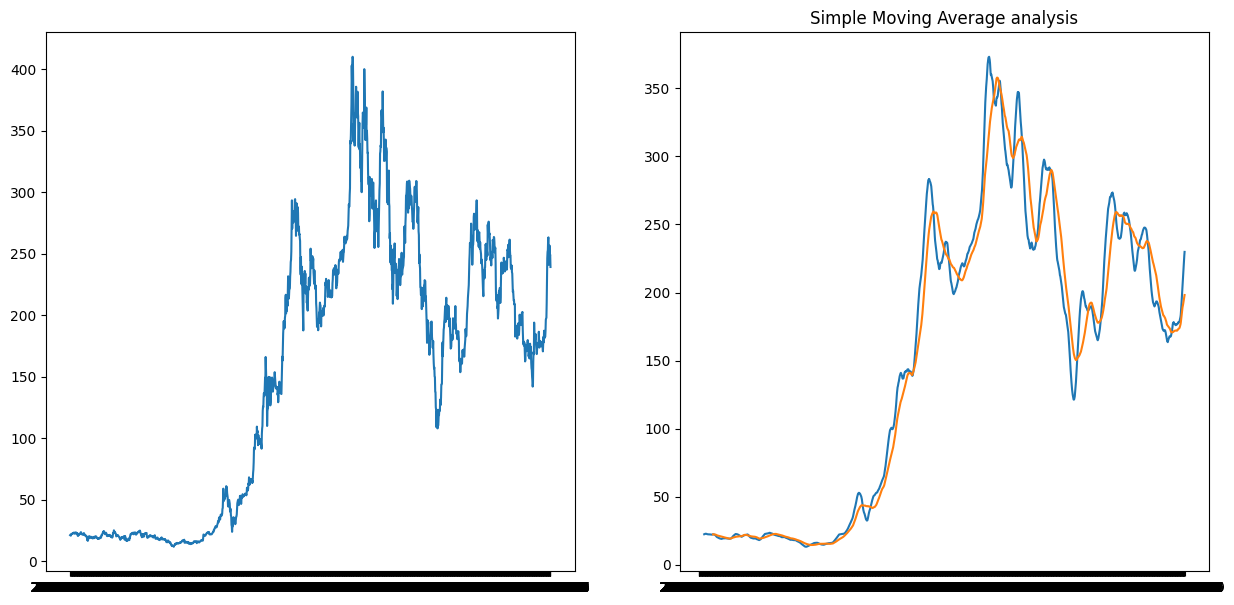

In [23]:
tsla_data['SMA_20'] = tsla_data['Close'].rolling(window=20).mean()
tsla_data['SMA_50'] = tsla_data['Close'].rolling(window=50).mean()

plt.figure(1,(15,7))
plt.subplot(1,2,1)
plt.plot(tsla_data['Close'],label='Close')
plt.subplot(1,2,2)
plt.plot(tsla_data['SMA_20'],label='SMA_20')
plt.plot(tsla_data['SMA_50'],label='SMA_50')

plt.title('Simple Moving Average analysis')
plt.show()

In [24]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=c7643e2b8359fef0f960db609418ea2fe59049bf2bfd55bdc44fa5873531bb46
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


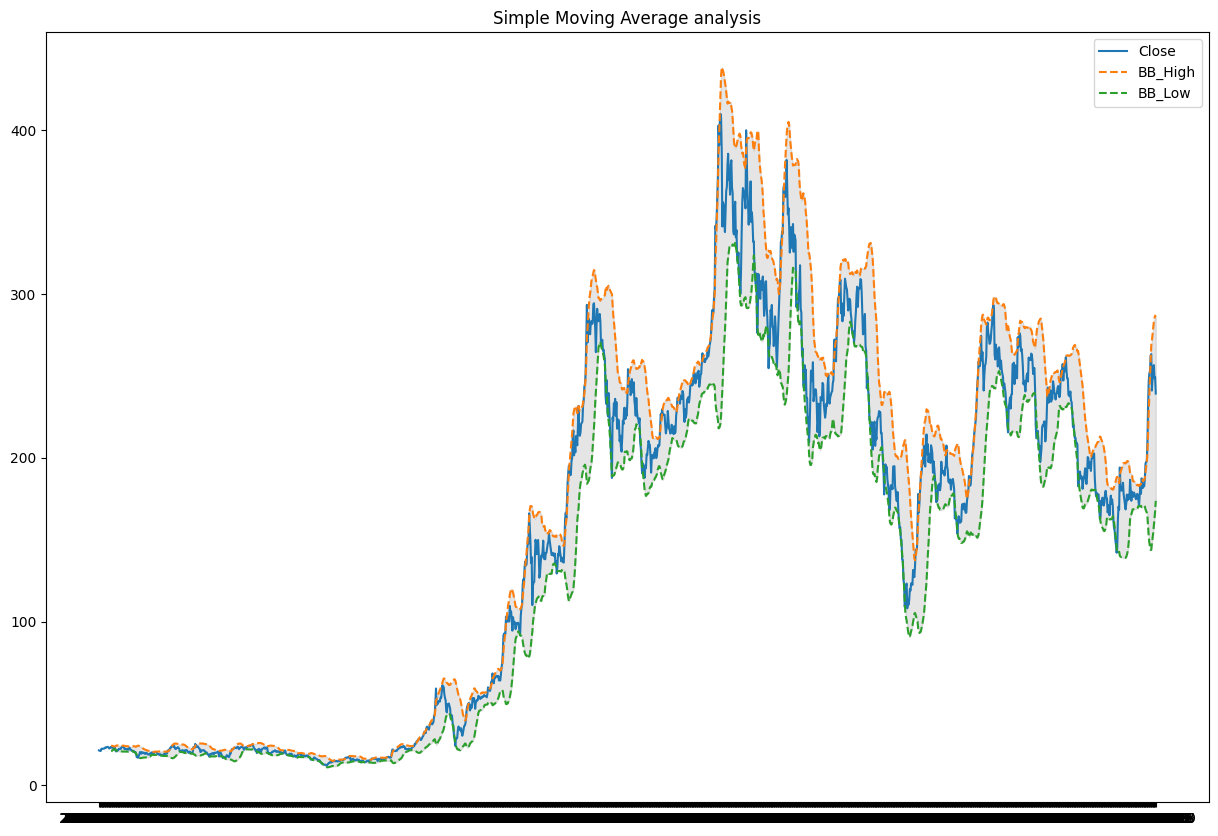

In [27]:
import ta

bb = ta.volatility.BollingerBands(tsla_data['Close'], window=20, window_dev=2)

tsla_data['BB_High'] = bb.bollinger_hband()
tsla_data['BB_Low'] = bb.bollinger_lband()
plt.figure(1,(15,10))
plt.plot(tsla_data['Close'],label='Close')
plt.plot(tsla_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(tsla_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(tsla_data.index,tsla_data['BB_High'],
                 tsla_data['BB_Low'],color = 'gray',alpha=0.2)
plt.legend()
plt.title('Simple Moving Average analysis')
plt.show()
#if bollinger band is narrowing, it indicates that there is decrease in volatility.
#if the stock price touches the upper bound, that means it is a overbought situation that means it will go down.
#if the stock price touches the lower bound, that means it will go up.
#

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2024-07-15,4,TSLA,252.64,265.60,251.7300,255.97,146912920,216.7975,192.8150,279.557930,154.037070,70.754312
2024-07-16,3,TSLA,256.56,258.62,245.8001,255.31,126332470,220.7250,194.3460,283.114805,158.335195,72.021860
2024-07-17,2,TSLA,248.50,258.47,246.1820,252.73,115584810,223.7780,195.6922,285.324052,162.231948,65.715167
2024-07-18,1,TSLA,249.23,257.14,247.2000,251.09,110869037,226.9965,196.9816,286.772082,167.220918,66.005515
2024-07-19,0,TSLA,239.20,249.44,236.8300,247.79,87403903,229.8780,198.2094,286.065007,173.690993,58.655507


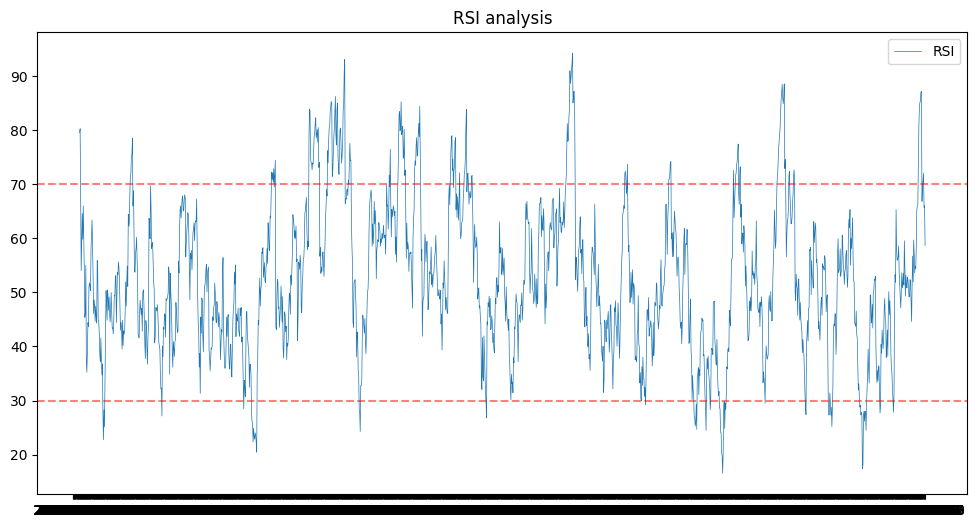

In [30]:
#relative strength index

tsla_data['RSI'] = ta.momentum.rsi(tsla_data['Close'],window=14)
tsla_data.tail()

plt.figure(1,(12,6))
plt.plot(tsla_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
tsla_data.tail()

#The rsi is a momentum oscillator that measures the speed and change of price movements
#It ranges from 0 to 100
#1. With a value above 70 indicates overbought situation.
#2. And value below 30 indicates oversold condition.

In [33]:
tsla_data.to_csv('Tesla_stock_2018_to_2024.csv')

In [ ]:
#icici - IBN
#infosys - INFY
#General Motors - GM
#HSBC - HSBC

In [49]:
import pandas_datareader as pdr
import datetime
import pandas as pd

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2024,7,20)

stock = ['INFY']

inf_data = pdr.DataReader(stock, 'stooq', str(start.date()),str(end.date())).stack('Symbols')
inf_data = inf_data.reset_index()
inf_data.set_index('Date',inplace=True)
inf_data.sort_index(inplace=True)

inf_data.head()

Attributes,Symbols,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,INFY,7.24550,7.28987,7.21909,7.23676,1.382488e+07
2018-01-03,INFY,7.18336,7.23676,7.16087,7.22341,1.152342e+07
2018-01-04,INFY,7.13869,7.20563,7.12544,7.20563,1.829198e+07
2018-01-05,INFY,7.27210,7.28556,7.18336,7.19209,1.102944e+07
2018-01-08,INFY,7.33012,7.34789,7.26778,7.28556,1.258842e+07


<Axes: title={'center': 'Infosys stock price'}, xlabel='Date', ylabel='Price'>

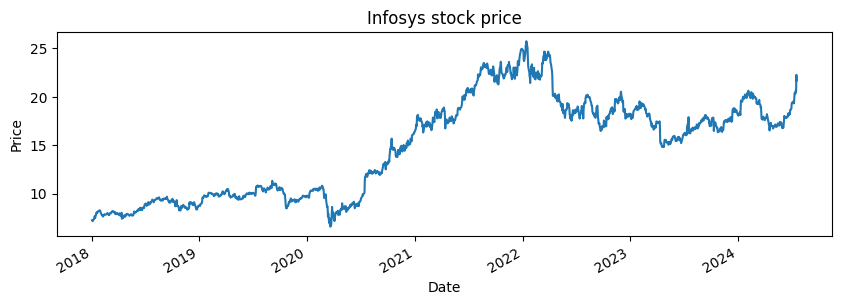

In [51]:
# and then sperate the close price
close_price = inf_data['Close']
# then plot the close price

close_price.plot(xlabel='Date',ylabel='Price',title='Infosys stock price',figsize=(10,3))

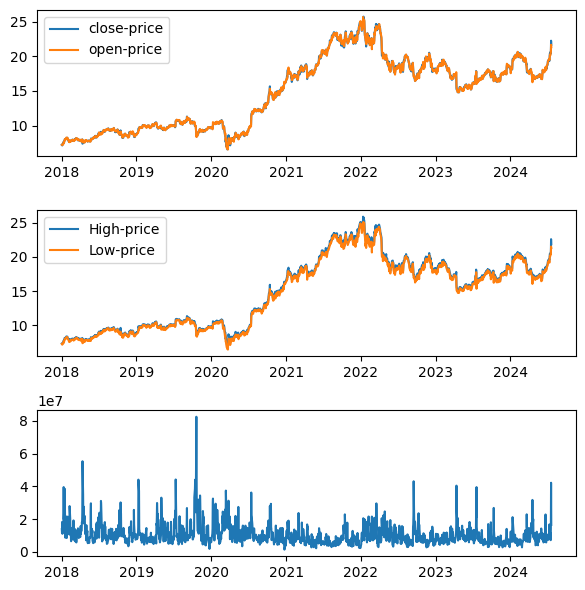

In [54]:
plt.figure(2,(6,6))
plt.subplot(3,1,1)
plt.plot(inf_data['Close'],label='close-price')
plt.plot(inf_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(inf_data['High'],label='High-price')
plt.plot(inf_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(inf_data['Volume'],label='Volumne')
plt.tight_layout()
plt.show()

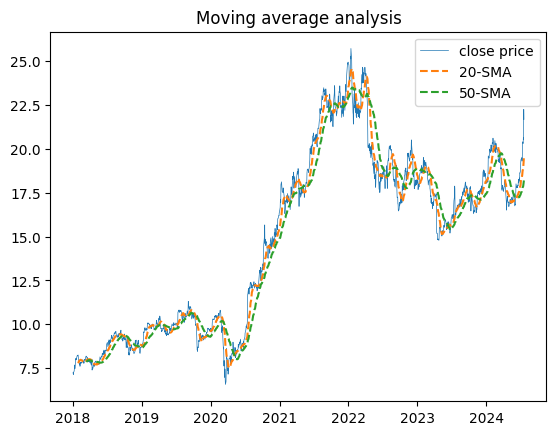

In [55]:
# calulate the moving average
inf_data['SMA_20'] = inf_data['Close'].rolling(20).mean()
inf_data['SMA_50'] = inf_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(inf_data['Close'],label='close price',linewidth=0.5)
plt.plot(inf_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(inf_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()


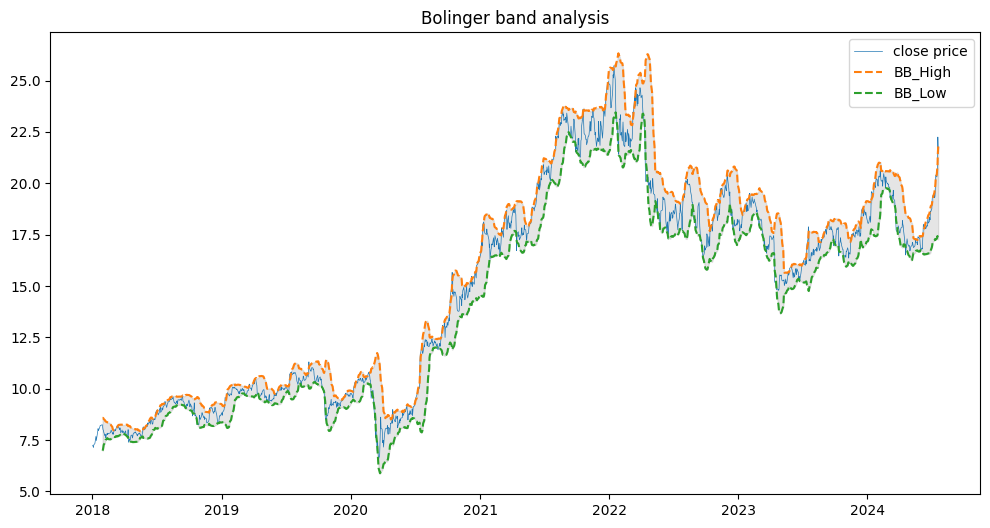

In [56]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(inf_data['Close'],window=20,window_dev=2)

inf_data['BB_High']=bb.bollinger_hband()
inf_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(inf_data['Close'],label='close price',linewidth=0.5)
plt.plot(inf_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(inf_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(inf_data.index,inf_data['BB_High'],
                 inf_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()


In [ ]:
stock_name = input('Enter your name: ')
